In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
train_dir = "train"
validation_dir = "valid"
test_dir = "test"


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 357 images belonging to 4 classes.
Found 102 images belonging to 4 classes.


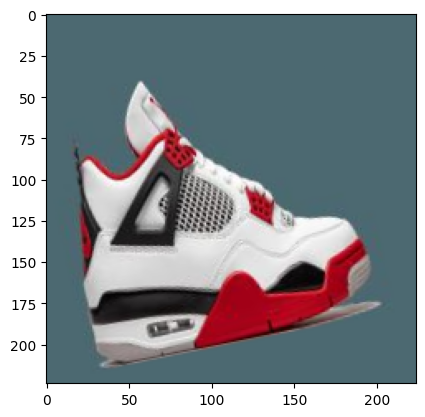

In [5]:
x, y = train_generator.next()
for i in range(0, 1):
    image = x[i]
    plt.imshow(image)
    plt.show()

    

# Baseline

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


In [18]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [19]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2)


Epoch 1/15
12/12 - 31s - loss: 4.1984 - accuracy: 0.2745 - val_loss: 1.3419 - val_accuracy: 0.3529 - 31s/epoch - 3s/step
Epoch 2/15
12/12 - 19s - loss: 1.3683 - accuracy: 0.3109 - val_loss: 1.3250 - val_accuracy: 0.3235 - 19s/epoch - 2s/step
Epoch 3/15
12/12 - 18s - loss: 1.3485 - accuracy: 0.3445 - val_loss: 1.3377 - val_accuracy: 0.3235 - 18s/epoch - 1s/step
Epoch 4/15
12/12 - 20s - loss: 1.3314 - accuracy: 0.3585 - val_loss: 1.3326 - val_accuracy: 0.3431 - 20s/epoch - 2s/step
Epoch 5/15
12/12 - 19s - loss: 1.3130 - accuracy: 0.3754 - val_loss: 1.3228 - val_accuracy: 0.3137 - 19s/epoch - 2s/step
Epoch 6/15
12/12 - 18s - loss: 1.3074 - accuracy: 0.3669 - val_loss: 1.3374 - val_accuracy: 0.4118 - 18s/epoch - 2s/step
Epoch 7/15
12/12 - 17s - loss: 1.3008 - accuracy: 0.3641 - val_loss: 1.3150 - val_accuracy: 0.3627 - 17s/epoch - 1s/step
Epoch 8/15
12/12 - 18s - loss: 1.2730 - accuracy: 0.3950 - val_loss: 1.3004 - val_accuracy: 0.3725 - 18s/epoch - 2s/step
Epoch 9/15
12/12 - 18s - loss: 1

# More convolutional layers, dropout, regularization, early stopping

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(4, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001))
])


In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping, checkpoint])

Epoch 1/30

Epoch 1: val_loss improved from inf to 1.89425, saving model to model.h5
12/12 - 32s - loss: 2.4641 - accuracy: 0.2941 - val_loss: 1.8943 - val_accuracy: 0.3235 - 32s/epoch - 3s/step
Epoch 2/30

Epoch 2: val_loss improved from 1.89425 to 1.74478, saving model to model.h5
12/12 - 25s - loss: 1.8164 - accuracy: 0.3193 - val_loss: 1.7448 - val_accuracy: 0.3235 - 25s/epoch - 2s/step
Epoch 3/30

Epoch 3: val_loss improved from 1.74478 to 1.64238, saving model to model.h5
12/12 - 25s - loss: 1.7137 - accuracy: 0.3025 - val_loss: 1.6424 - val_accuracy: 0.3235 - 25s/epoch - 2s/step
Epoch 4/30

Epoch 4: val_loss improved from 1.64238 to 1.60380, saving model to model.h5
12/12 - 25s - loss: 1.6378 - accuracy: 0.3137 - val_loss: 1.6038 - val_accuracy: 0.3235 - 25s/epoch - 2s/step
Epoch 5/30

Epoch 5: val_loss improved from 1.60380 to 1.57407, saving model to model.h5
12/12 - 25s - loss: 1.5992 - accuracy: 0.3165 - val_loss: 1.5741 - val_accuracy: 0.3235 - 25s/epoch - 2s/step
Epoch 6/3

# Add data augmentation, remove some convolutional layers and dense layer,

In [17]:

from keras.layers import RandomFlip, RandomRotation, RandomZoom


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    RandomFlip("horizontal"),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    RandomRotation(0.1),
    RandomZoom(0.1),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    RandomZoom(0.1),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Conv2D(512, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(512, (3, 3), activation='relu'),
    # # MaxPooling2D((2, 2)),
    # Dropout(0.35),
    # Conv2D(512, (3, 3), activation='relu'),
    # # MaxPooling2D((2, 2)),
    # Conv2D(512, (3, 3), activation='relu'),
    # # MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(4, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.001))
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping, checkpoint])

Epoch 1/30

Epoch 1: val_loss improved from inf to 1.38961, saving model to model.h5
12/12 - 27s - loss: 1.4079 - accuracy: 0.2801 - val_loss: 1.3896 - val_accuracy: 0.3431 - 27s/epoch - 2s/step
Epoch 2/30

Epoch 2: val_loss improved from 1.38961 to 1.37411, saving model to model.h5
12/12 - 26s - loss: 1.3949 - accuracy: 0.2829 - val_loss: 1.3741 - val_accuracy: 0.3235 - 26s/epoch - 2s/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.37411
12/12 - 24s - loss: 1.3765 - accuracy: 0.3165 - val_loss: 1.3750 - val_accuracy: 0.3235 - 24s/epoch - 2s/step
Epoch 4/30

Epoch 4: val_loss improved from 1.37411 to 1.36880, saving model to model.h5
12/12 - 22s - loss: 1.3747 - accuracy: 0.3109 - val_loss: 1.3688 - val_accuracy: 0.3235 - 22s/epoch - 2s/step
Epoch 5/30

Epoch 5: val_loss improved from 1.36880 to 1.34290, saving model to model.h5
12/12 - 18s - loss: 1.3672 - accuracy: 0.3109 - val_loss: 1.3429 - val_accuracy: 0.3235 - 18s/epoch - 1s/step
Epoch 6/30

Epoch 6: val_loss did not i

In [18]:
from keras.layers import BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(4, activation='softmax'))

cnn4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = cnn4.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping, checkpoint])

Epoch 1/30

Epoch 1: val_loss did not improve from 1.32550
12/12 - 331s - loss: 2.3945 - accuracy: 0.3053 - val_loss: 6.8127 - val_accuracy: 0.1961 - 331s/epoch - 28s/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.32550
12/12 - 234s - loss: 2.1188 - accuracy: 0.2577 - val_loss: 7.1679 - val_accuracy: 0.3529 - 234s/epoch - 19s/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.32550
12/12 - 275s - loss: 2.0737 - accuracy: 0.2773 - val_loss: 6.6596 - val_accuracy: 0.2549 - 275s/epoch - 23s/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.32550
12/12 - 252s - loss: 1.9161 - accuracy: 0.3081 - val_loss: 12.4952 - val_accuracy: 0.1961 - 252s/epoch - 21s/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.32550
12/12 - 116s - loss: 1.8272 - accuracy: 0.3165 - val_loss: 12.8883 - val_accuracy: 0.1961 - 116s/epoch - 10s/step
Epoch 6/30

Epoch 6: val_loss did not improve from 1.32550
12/12 - 114s - loss: 1.8000 - accuracy: 0.3137 - val_loss: 8.3375 - val_accurac

# Transfer Learning

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[early_stopping, checkpoint])

Epoch 1/30

Epoch 1: val_loss did not improve from 1.29270
12/12 - 52s - loss: 4.9826 - accuracy: 0.3445 - val_loss: 4.2547 - val_accuracy: 0.2353 - 52s/epoch - 4s/step
Epoch 2/30

Epoch 2: val_loss improved from 1.29270 to 0.76544, saving model to model.h5
12/12 - 51s - loss: 2.8768 - accuracy: 0.3978 - val_loss: 0.7654 - val_accuracy: 0.6667 - 51s/epoch - 4s/step
Epoch 3/30

Epoch 3: val_loss did not improve from 0.76544
12/12 - 51s - loss: 1.5130 - accuracy: 0.4706 - val_loss: 0.7974 - val_accuracy: 0.6078 - 51s/epoch - 4s/step
Epoch 4/30

Epoch 4: val_loss improved from 0.76544 to 0.59574, saving model to model.h5
12/12 - 51s - loss: 0.9641 - accuracy: 0.6022 - val_loss: 0.5957 - val_accuracy: 0.8333 - 51s/epoch - 4s/step
Epoch 5/30

Epoch 5: val_loss improved from 0.59574 to 0.45113, saving model to model.h5
12/12 - 51s - loss: 0.8105 - accuracy: 0.6751 - val_loss: 0.4511 - val_accuracy: 0.9020 - 51s/epoch - 4s/step
Epoch 6/30

Epoch 6: val_loss improved from 0.45113 to 0.41883, s